In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
sys.path.insert(0, '..')
import dataset

In [62]:
def heatmap(ds, cell_order, cns, n_cns, n_cts, filename=None, index=None, ax=None, cbar=True, cbar_ax=None, vert=False):
    label_counts = np.zeros((n_cns, n_cts))
    tissue_avgs = np.zeros(n_cts)
    for sample in ds.data:
        for image in ds.data[sample]:
            for i, freq in enumerate(ds.data[sample][image].cts_oh):
                label_counts[cns[sample][image][i]] += freq
                tissue_avgs += freq
    # print(label_counts)
    tissue_avgs /= tissue_avgs.sum()

    fc = np.log2(((label_counts + tissue_avgs) / (label_counts + tissue_avgs).sum(axis=1, keepdims=True)) / tissue_avgs)
    if index:
        fc = pd.DataFrame(fc, columns=cell_order, index=index)
    else:
        fc = pd.DataFrame(fc, columns=cell_order, index=[f'CN-{i+1}' for i in range(n_cns)])
    if not vert:
        plt.figure(figsize=(10, 5))
        ax = sns.heatmap(fc, vmin=-3, vmax=3, cmap='bwr', linewidths=0.5, cbar_kws={'location': 'left', 'label': 'Enrichment score', 'pad': 0.04}, cbar=cbar)
    else:
        plt.figure(figsize=(5, 10))
        sns.heatmap(fc.T, vmin=-3, vmax=3, cmap='bwr', linewidths=0.5, cbar_kws={'orientation': 'vertical', 'label': 'Enrichment score'}, ax=ax, cbar=cbar, cbar_ax=cbar_ax)

    cn_freq = label_counts / label_counts.sum(axis=1, keepdims=True)
    cn_freq_all = label_counts / label_counts.sum()

    matx, maty = np.zeros(cn_freq.shape), np.zeros(cn_freq.shape)
    for i in range(len(matx)):
        matx[i] += i
    for j in range(len(matx[0])):
        maty[:, j] += j
    if not vert:
        scatter = ax.scatter(0.5 + maty, 0.5 + matx, marker='o', s=cn_freq * 60, color='black')
    else:
        scatter = ax.scatter(0.5 + matx, 0.5 + maty, marker='o', s=cn_freq * 60, color='black')
    # print(cn_freq.max(axis=1))

    legend = ax.legend(*scatter.legend_elements(**dict(prop='sizes', num=4, func=lambda s: s/60)), title=f'CT frequency per CN', loc='upper left', frameon=False, edgecolor='k', bbox_to_anchor=(1, 0))
    
    plt.setp(legend.get_title(), multialignment='center')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30 if vert else 45, ha='right')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    
    return ax

In [63]:
# CRC:

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# ds.cts_sg_to_oh()
# cells = ds.ct_order
# params = {'n_cns': 9, 'n_cts': 28} 

# Uncomment one of these results on CRC

# cns = pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32.0_r=0.8_max_neighbors=-1_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Macrophage enriched', 'CN-2: Macrophage & mixed cell enriched', 'CN-3: Smooth muscle', 'CN-4: Granulocyte enriched', 'CN-5: T cell enriched', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasculature enriched', 'CN-8: Immune-infiltrated stroma', 'CN-9: Bulk tumor']

# cns = pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_eta=2.0_max_neighbors=-1_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Smooth muscle', 'CN-2: Immune-infiltrated stroma', 'CN-3: Bulk tumor', 'CN-4: Follicle', 'CN-5: Granulocyte enriched', 'CN-6: Immune cell enriched', 'CN-7: T cell enriched', 'CN-8: Tumor boundary', 'CN-9: Macrophage enriched']

# cns = pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50.0_b=0.025_train_size_fraction=0.99_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Granulocyte enriched', 'CN-2: Immune-infiltrated stroma & tumor boundary', 'CN-3: Follicle', 'CN-4: T cell enriched', 'CN-5: Smooth muscle', 'CN-6: Vasculature, macrophage & plasma enriched', 'CN-7: Undefined cell enriched', 'CN-8: Macrophage & T cell enriched', 'CN-9: Bulk tumor']


# T2D:

# ds = pickle.load(open('../data/T2D/T2D_ds.pkl', 'rb'))
# ds.cts_sg_to_oh()
# cells = ds.ct_order
# params = {'n_cns': 6, 'n_cts': 10}

# Uncomment one of these results on T2D

# cns = pickle.load(open('../cn/T2D/CC/cns_n_cns=6_m=5_exclude_cts=[]_seed=0_HMRF_45.0_9.0.pkl', 'rb'))
# ind = ['CN-1: Beta cell enriched', 'CN-2: Alpha & beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Endothelial cell enriched', 'CN-5: Alpha & mixed cell enriched', 'CN-6: Delta, gamma & macrophage cell enriched']

# cns = pickle.load(open('../cn/T2D/CNE/cns_n_cns=6_eta=2.0_max_neighbors=-1_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Gamma cell enriched', 'CN-4: Macrophage enriched', 'CN-5: Delta cell enriched', 'CN-6: Endothelial cell enriched']

# cns = pickle.load(open('../cn/T2D/Spatial LDA/cns_n_cns=6_eps=100.0_b=0.25_train_size_fraction=0.989_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Endothelial cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Gamma cell enriched', 'CN-5: Delta cell enriched', 'CN-6: Alpha, macrophage & endothelial cell enriched']


# HLT:

ds = pickle.load(open('../data/HLT/HLT_ds.pkl', 'rb'))
ds.cts_sg_to_oh()
cells = ds.ct_order
params = {'n_cns': 11, 'n_cts': 24}

# Uncomment one of these results on HLT

# cns = pickle.load(open('../cn/HLT/CC/cns_n_cns=11_m=20_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['cnTsp: Tetraspanin positive cell enriched', 'cnBT: B & T cell enriched', 'cnT: T cell enriched', 'cnMph: Macrophage enriched', 'cnDZ: Dark zone', 'cnB: B cell enriched', 'cnGr: Granulocyte enriched', 'cnEp: Epithelial cell enriched', 'cnV: Blood vessel', 'cnLZ: Light zone', 'cnVT: Blood vessel & T cell enriched']

# cns = pickle.load(open('../cn/HLT/CF-IDF/cns_n_cns=11_eps=23.0_r=0.8_max_neighbors=100_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['cnMph: Macrophage enriched', 'cnLZDZ: Light & dark zone', 'cnMphNK: Macrophage & NK cell enriched', 'cnT: T cell enriched', 'cnEp: Epithelial cell enriched', 'cnV: Blood vessel', 'cnB: B cell enriched', 'cnGr: Granulocyte enriched', 'cnPl: Plasma cell enriched', 'cnTsp: Tetraspanin positive cell enriched', 'cnGrMph: Granulocyte & macrophage enriched']

cns = pickle.load(open('../cn/HLT/CNE/cns_n_cns=11_eta=2.0_max_neighbors=100_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
ind = ['cnBT: B & T cell enriched', 'cnEp: Epithelial cell enriched', 'cnTsp: Tetraspanin positive cell enriched', 'cnV: Blood vessel', 'cnDZ: Dark zone', 'cnLZ: Light zone', 'cnMph: Macrophage enriched', 'cnPl: Plasma cell enriched', 'cnT: T cell enriched', 'cnB: B cell enriched', 'cnGr: Granulocyte enriched']


# ind = [i.split(':')[0] for i in ind]

<AxesSubplot:>

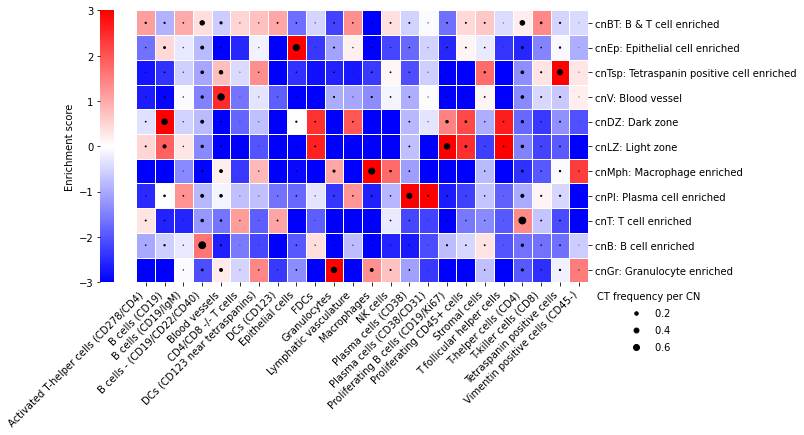

In [64]:
heatmap(ds, cells, cns, **params, filename='../analysis_res/HLT/CNE/enrich.pdf', index=ind)